In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D
from keras.datasets import mnist,cifar10
from tensorflow.keras.preprocessing.image import array_to_img, ImageDataGenerator,  load_img, img_to_array
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import shutil
import numpy as np

# 🤖 Introducción a Redes Neuronales Convolucionales (CNN)

Las **Redes Neuronales Convolucionales** o **CNN** (*Convolutional Neural Networks*) son un tipo especial de red neuronal diseñadas para trabajar con **imágenes**. Son muy utilizadas porque aprenden a detectar patrones visuales como bordes, formas o colores automáticamente, sin que una persona tenga que programar esos patrones a mano.

---

## 🔎 ¿Cómo funcionan? Imagina una lupa inteligente 🕵️‍♀️

Imagina que tienes una **lupa** que recorre una imagen, **poco a poco**, buscando cosas como líneas, esquinas, círculos, etc.

Esa lupa es lo que en redes neuronales se llama un **filtro** o **kernel**. Este filtro se va deslizando por la imagen y en cada parte que mira, **hace una pequeña operación matemática** para detectar si hay algo interesante ahí (como un borde o un contorno).

Ese proceso se llama **convolución**. Y las redes CNN utilizan **muchas lupas diferentes**, cada una entrenada para detectar algo específico. Algunas se especializan en encontrar líneas verticales, otras horizontales, otras detectan sombras, etc.

> 🧠 **Analogía completa**: imagina que estás armando un rompecabezas, y usas lupas para mirar cada pieza y ver si tiene una cara, un árbol o una parte del cielo. Las CNN hacen eso: **exploran pedazo por pedazo** y van entendiendo qué hay en la imagen.

---

## 🧩 ¿Qué componentes tiene una CNN?

1. **Capas convolucionales**: las "lupas inteligentes" que detectan patrones.
2. **Capas de activación (ReLU)**: ayudan a que la red entienda patrones complejos.
3. **Capas de pooling (reducción)**: resumen lo más importante de cada región.
4. **Capas densas**: al final, hacen la predicción con la información aprendida.

---

## 🎯 ¿Para qué se usan?

Las CNN son ideales cuando trabajamos con **imágenes o datos visuales**. Ejemplos reales:

- Reconocimiento facial (para desbloquear tu celular)
- Detección de enfermedades en imágenes médicas (radiografías, resonancias)
- Vehículos autónomos (identificar semáforos o peatones)
- Clasificación de productos por imagen en tiendas virtuales

---


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8835 - loss: 0.4251 - val_accuracy: 0.9643 - val_loss: 0.1293
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/tmp/ipython-input-7-3266164211.py:47: UserWarning: Glyph 129488 (\N{FACE WITH MONOCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129488 (\N{FACE WITH MONOCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


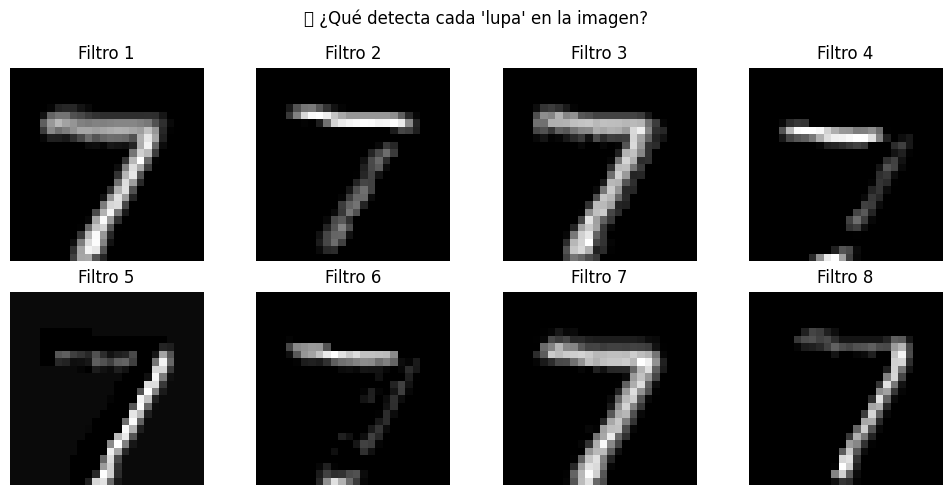

In [ ]:
# 1. Cargar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Preprocesar: redimensionar y normalizar
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# 3. Definir modelo con API funcional
inputs = Input(shape=(28, 28, 1))
x = Conv2D(8, (3, 3), activation="relu")(inputs)  # 8 filtros/lupas
x_flat = Flatten()(x)
outputs = Dense(10, activation="softmax")(x_flat)

model = Model(inputs=inputs, outputs=outputs)

# 4. Compilar y entrenar
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train_cat, epochs=1, validation_data=(x_test, y_test_cat))

# 5. Crear un modelo intermedio para visualizar la salida de la capa convolucional
feature_extractor = Model(inputs=model.input, outputs=model.get_layer(index=1).output)

# 6. Seleccionar una imagen del test
img = x_test[0].reshape(1, 28, 28, 1)

# 7. Obtener mapas de activación (feature maps)
feature_maps = feature_extractor.predict(img)

# 8. Graficar lo que ve cada filtro
plt.figure(figsize=(10, 5))
for i in range(feature_maps.shape[-1]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap="gray")
    plt.title(f"Filtro {i+1}")
    plt.axis("off")

plt.suptitle("🧐 ¿Qué detecta cada 'lupa' en la imagen?")
plt.tight_layout()
plt.show()

# ⚙️ Hiperparámetros clave de `Conv2D` en Keras

Cuando usamos una **capa convolucional** en Keras (`Conv2D`), hay varios parámetros importantes que controlan **cómo funcionan nuestras "lupas"** y cómo se procesa la imagen.

A continuación, te explicamos los principales con ejemplos simples y analogías visuales:

---

## 🔑 Principales hiperparámetros:

### 1. `filters`
Cantidad de **lupas** (filtros) que se aplican a la imagen. Cada una aprende a detectar un patrón distinto.

- Más filtros → más capacidad de aprender detalles.
- Ej: `filters=8` aplica 8 filtros diferentes.

### 2. `kernel_size`
Tamaño de la lupa (o filtro) que se desliza sobre la imagen.

- Ej: `(3, 3)` es una lupa de 3x3 píxeles.
- Lupa pequeña → detecta detalles finos.
- Lupa grande → detecta patrones más amplios.

### 3. `strides`
Qué tanto se mueve la lupa cada vez.

- `(1, 1)` → se mueve 1 pixel a la vez (más lento, más detalle).
- `(2, 2)` → se mueve 2 pixeles a la vez (más rápido, pierde detalle).

| Forma            | Equivalente a    | ¿Cuándo usarla?                                    |
| ---------------- | ---------------- | -------------------------------------------------- |
| `strides=2`      | `strides=(2, 2)` | Si ambos ejes se mueven igual (más corto y limpio) |
| `strides=(2, 1)` | -                | Si quieres control **por separado** en X y Y       |


### 4. `padding`
Determina si la imagen se **rellena en los bordes** o no.

- `"valid"` → no hay relleno (la imagen se va achicando).
- `"same"` → se rellena para que la salida tenga el mismo tamaño que la entrada.

### 5. `activation`
Función matemática que se aplica después de la convolución.

- Comúnmente se usa `"relu"` para introducir **no linealidad**.
- Sin activación, solo tendríamos combinaciones lineales (muy limitadas).

---

## 📌 Ejemplo intuitivo

```python
Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')
```

Esto crea 16 filtros de 3x3 que se mueven 1 pixel a la vez, rellenando bordes para que la salida tenga el mismo tamaño que la entrada.

🧠 Piensa en filters como cantidad de lentes, kernel_size como tamaño de cada lupa, strides como qué tan rápido recorren la imagen, y padding como si les permitimos mirar los bordes o no.

![alt text](https://www.appliedaicourse.com/blog/wp-content/uploads/2024/10/convolution-layer-1024x848.webp)

# 🏛️ LeNet: La red neuronal que inició la revolución visual

**LeNet-5** es una de las primeras redes neuronales convolucionales (CNN) exitosas. Fue desarrollada en 1998 por **Yann LeCun**, uno de los padres de la inteligencia artificial moderna.

## 🔍 ¿Qué resolvía?

LeNet fue diseñada originalmente para reconocer **dígitos escritos a mano** en imágenes, como los del sistema de reconocimiento de cheques bancarios.

> 📸 Hoy en día, tareas como esta parecen sencillas, pero en los años 90 era un gran desafío para las computadoras.

---

## 🧠 ¿Cómo está construida LeNet?

La arquitectura de LeNet es **sencilla pero muy poderosa**. Tiene una estructura típica de las CNN modernas:

1. **Entrada**: una imagen de 32x32 píxeles en escala de grises.
2. **Capa convolucional 1 (C1)**:
   - 6 filtros de tamaño 5x5
   - Resultado: 6 mapas de características de 28x28
3. **Capa de pooling 1 (S2)**:
   - Reducción con max pooling (2x2), obteniendo 6 mapas de 14x14
4. **Capa convolucional 2 (C3)**:
   - 16 filtros de 5x5
   - Resultado: 16 mapas de 10x10
5. **Capa de pooling 2 (S4)**:
   - Otro max pooling → mapas de 5x5
6. **Capas densas (C5 y F6)**:
   - Totalmente conectadas (como en redes tradicionales)
7. **Salida**:
   - 10 neuronas para clasificar del 0 al 9 (en problemas como MNIST)

---

## 🎯 ¿Por qué es importante?

- LeNet mostró que las CNN podían **aprender patrones directamente de los píxeles**, sin intervención humana.
- Fue una de las primeras redes en combinar:
  - Convoluciones
  - Pooling
  - Capas densas
- Sentó las bases para arquitecturas modernas como AlexNet, VGG y ResNet.

---

## 🧪 ¿Dónde se usa una red tipo LeNet hoy?

- Reconocimiento de escritura a mano (ej. formularios o exámenes escaneados)
- Lectura automática de códigos postales
- Cualquier tarea donde los datos visuales sean **simples y en blanco y negro**

> 📘 Aunque hoy existen redes más grandes, LeNet sigue siendo útil para aprender, experimentar y correr en equipos con pocos recursos.

---


In [ ]:
# 1. Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Preprocesar
# LeNet espera entrada 32x32 (no 28x28), así que redimensionamos
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), 'constant')
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), 'constant')

x_train = x_train.reshape(-1, 32, 32, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 32, 32, 1).astype("float32") / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 3. Construcción de LeNet
model = Sequential([
    #-----------------------
    Conv2D(6, kernel_size=(5,5), activation='tanh', input_shape=(32, 32, 1)),
    #-----------------------
    AveragePooling2D(pool_size=(2, 2)),
    #-----------------------
    Conv2D(16, kernel_size=(5,5), activation='tanh'),
    #-----------------------
    AveragePooling2D(pool_size=(2, 2)),
    #-----------------------
    Flatten(),
    #-----------------------
    Dense(120, activation='tanh'),
    #-----------------------
    Dense(84, activation='tanh'),
    #-----------------------
    Dense(10, activation='softmax')
])

# 4. Compilar y entrenar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=1, validation_data=(x_test, y_test_cat))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8852 - loss: 0.4034 - val_accuracy: 0.9670 - val_loss: 0.1075


# 🔄 Generadores de datos en Deep Learning (Keras)

## 🧠 ¿Qué es un generador de datos?

Un **generador de datos** es una técnica que permite **cargar y procesar datos por partes (por lotes)** en lugar de todo el dataset completo a la vez.

En lugar de tener todo en memoria, el generador **"sirve" los datos al modelo poco a poco**, mientras se entrena. Esto es especialmente útil cuando:

- Tienes **millones de imágenes** que no caben en la memoria RAM.
- Quieres aplicar **transformaciones en tiempo real** (como rotar, voltear o escalar imágenes) sin crear archivos nuevos.

---

## 🎯 ¿Cuándo se recomienda usar generadores?

- Cuando el dataset es **muy grande** (imágenes de alta resolución, audio, video).
- Cuando quieres aplicar **data augmentation** (aumentar artificialmente los datos).
- Cuando los datos están **en carpetas o archivos separados**.
- Cuando haces **entrenamiento en la nube** y debes optimizar el uso de memoria.

---

## 🔧 Tipos comunes de generadores en Keras

Keras ofrece generadores preconstruidos que se adaptan a distintos escenarios:

### 📁 1. `ImageDataGenerator`
- Sirve imágenes desde carpetas.
- Permite hacer **data augmentation en tiempo real**.
- Ideal para proyectos de clasificación de imágenes.

Ejemplo:
```python
from keras.preprocessing.image import ImageDataGenerator
```

## 🧩 2. Generadores personalizados (Sequence)
- Para datos más complejos: varias entradas, formatos no estándar.

- Ideal cuando quieres controlar completamente cómo se cargan y procesan los datos.

- Basado en clases de Python que heredan de keras.utils.Sequence.

🧪 ¿Qué ventajas tienen?
- ✅ Ahorro de memoria
- ✅ Aumento automático de datos
- ✅ Carga eficiente desde disco
- ✅ Flexibilidad para datos complejos

## 📸 Ejemplo real de uso
Imagina que tienes carpetas con fotos de perros y gatos para clasificarlas. Con un generador, puedes entrenar tu modelo sin cargar todas las imágenes a la vez, y además girar o voltear algunas en cada época para que el modelo aprenda mejor.

🧠 Piensa en el generador como un chef que te sirve los datos plato por plato, en lugar de llevarte todo el bufé a la mesa de una sola vez.

In [ ]:
# Cargar dataset
(x_train, y_train), (_, _) = cifar10.load_data()

# Nombres de las clases
labels = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']

# Crear estructura de carpetas
base_dir = 'data/train'
if not os.path.exists(base_dir):
    for label in labels:
        os.makedirs(os.path.join(base_dir, label), exist_ok=True)

# Contador por clase
saved_per_class = {label: 0 for label in labels}
max_per_class = 100

# Guardar imágenes
for i in range(len(x_train)):
    label_index = y_train[i][0]
    label = labels[label_index]

    if saved_per_class[label] < max_per_class:
        img = array_to_img(x_train[i])
        img.save(os.path.join(base_dir, label, f'{saved_per_class[label]}.png'))
        saved_per_class[label] += 1

    # Cortar si ya tenemos todo
    if all(count >= max_per_class for count in saved_per_class.values()):
        break

print("✅ Se guardaron 100 imágenes por cada clase en carpetas correspondientes.")


✅ Se guardaron 100 imágenes por cada clase en carpetas correspondientes.


In [ ]:
# 1. Crear generador con aumento de datos
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# 2. Preparar generadores desde carpeta de imágenes
# Supone estructura: data/train/clase_1, data/train/clase_2, etc.
train_generator = datagen.flow_from_directory(
    'data/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    'data/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 3. Modelo simple para clasificación de imágenes
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Entrenar con generadores
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Found 1000 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.1177 - loss: 2.5754 - val_accuracy: 0.1500 - val_loss: 2.2037
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - accuracy: 0.1675 - loss: 2.1433 - val_accuracy: 0.2750 - val_loss: 2.0812
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.2385 - loss: 2.0635 - val_accuracy: 0.2850 - val_loss: 2.0027
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.2602 - loss: 1.9893 - val_accuracy: 0.3100 - val_loss: 1.9855
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.2571 - loss: 1.9511 - val_accuracy: 0.3150 - val_loss: 1.9053


# 🧪 Hiperparámetros clave de `ImageDataGenerator` (Keras)

`ImageDataGenerator` es una clase de Keras que permite generar imágenes procesadas **en tiempo real** mientras entrenas un modelo. Esto incluye:

✅ **Normalización de imágenes**  
✅ **Aumento artificial del dataset** (data augmentation)  
✅ **División en entrenamiento y validación**

---

## 🔑 Hiperparámetros más importantes

| Parámetro            | ¿Qué hace?                                                                 | Ejemplo                |
|----------------------|---------------------------------------------------------------------------|------------------------|
| `rescale`            | Reescala los píxeles (útil para normalizar).                             | `rescale=1./255`       |
| `rotation_range`     | Rota la imagen aleatoriamente hasta X grados.                            | `rotation_range=30`    |
| `width_shift_range`  | Desplaza horizontalmente la imagen (como mover a la izquierda/derecha).  | `width_shift_range=0.1`|
| `height_shift_range` | Desplaza verticalmente la imagen (sube o baja).                          | `height_shift_range=0.1`|
| `zoom_range`         | Aplica zoom in/out aleatorio.                                             | `zoom_range=0.2`       |
| `shear_range`        | Aplica distorsión angular (como si inclinaras la imagen).                | `shear_range=10`       |
| `horizontal_flip`    | Invierte horizontalmente la imagen (izquierda ↔ derecha).                | `horizontal_flip=True` |
| `vertical_flip`      | Invierte verticalmente (arriba ↔ abajo).                                 | `vertical_flip=True`   |
| `validation_split`   | Divide parte de los datos como validación.                               | `validation_split=0.2` |

---

## 📌 ¿Por qué son útiles?

- **Mejoran la capacidad de generalización del modelo**.
- Simulan tener un dataset más grande sin necesidad de recolectar más imágenes.
- Evitan el sobreajuste (overfitting).

---

## 🧠 Analogía visual

Imagina que tienes una sola foto de un perro 🐶. El generador puede:

- Girarla un poco → el perro está de lado.
- Acercarla → zoom en la cara.
- Desplazarla → parece estar más a la izquierda.
- Voltearla → se ve mirando hacia el otro lado.

Así, el modelo aprende que **es el mismo perro**, sin importar el ángulo o la posición. 🧠

---

## ✅ Ejemplo común

```python
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
```

Esto creará un generador que:

- Escala los valores de píxeles (0 a 1),

- Aplica rotación, desplazamiento, zoom, y voltea horizontalmente,

- Separa el 20% de los datos para validación.

/tmp/ipython-input-9-1154656759.py:32: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


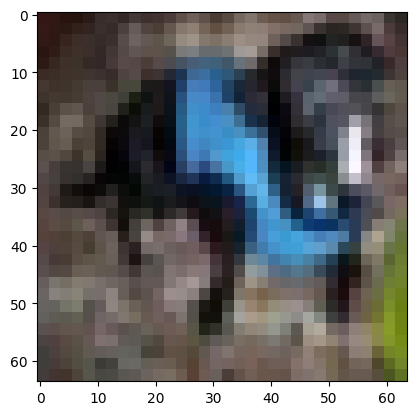

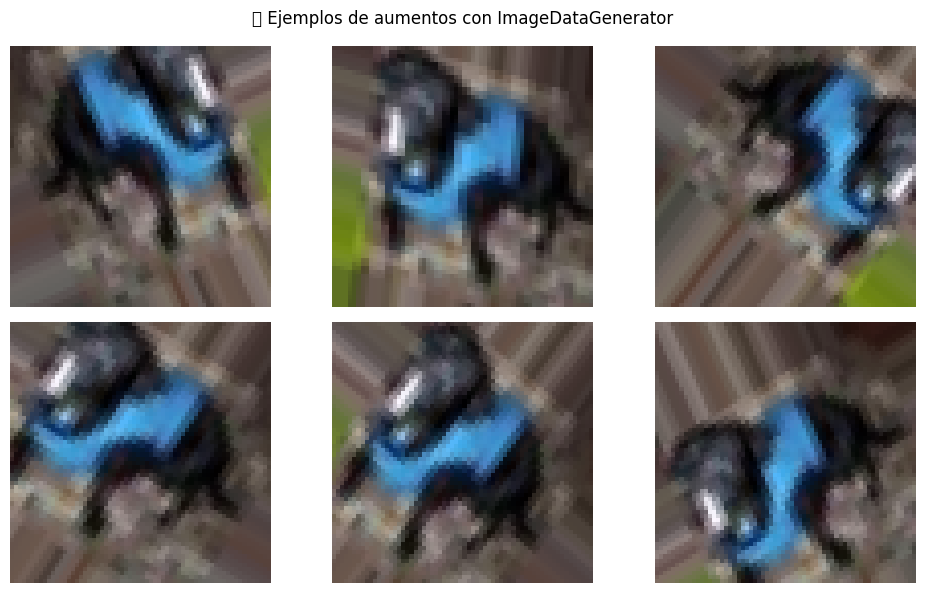

In [ ]:
# Cargar una imagen de ejemplo desde las carpetas creadas antes
img_path = 'data/train/perro/0.png'
img = load_img(img_path, target_size=(64, 64))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)  # Agregar dimensión para batch

# Crear generador con aumentos
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Visualizar 6 imágenes transformadas

plt.imshow(img)
i = 0
plt.figure(figsize=(10, 6))
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 3, i+1)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    i += 1
    if i == 6:
        break

plt.suptitle("🎨 Ejemplos de aumentos con ImageDataGenerator")
plt.tight_layout()
plt.show()

# 🧱 ResNet: Redes Residuales Profundas

## 🤔 ¿Qué es ResNet?

**ResNet** (Residual Network) es una arquitectura de red neuronal profunda que **revolucionó el entrenamiento de redes muy profundas**. Fue desarrollada por Microsoft Research y ganó el concurso **ImageNet** en 2015 con una precisión impresionante.

---

## 🔍 ¿Cuál era el problema?

Antes de ResNet, entrenar redes muy profundas (más de 20-30 capas) causaba un fenómeno llamado:

> ❌ **Degradación del rendimiento**: entre más capas tenía la red, **peor aprendía**.

Esto no era por sobreajuste, sino porque las redes **dejaban de aprender** al aumentar la profundidad.

---

## 💡 ¿Cómo ResNet solucionó esto?

Con una idea **sorprendentemente simple pero muy poderosa**:  
### ➕ Añadieron conexiones residuales o "atajos".

Estas conexiones **saltan capas intermedias** y permiten que la red:

- Aprenda más rápido.
- Evite perder información.
- Use capas profundas sin atascarse.

### 🧠 Analogía: autopista con salidas rápidas

Imagina que vas por una autopista (la red profunda) pero hay mucho tráfico.  
ResNet construyó **puentes** que te dejan **saltar partes del camino** si no te sirven, lo cual acelera todo el proceso.

---

## 🔧 ¿Cómo luce un bloque residual?

En lugar de simplemente pasar la salida de una capa a la siguiente, ResNet hace esto:

```python
output = capa(x)
output += x  # 🔁 suma la entrada original
```

Esto se llama un "skip connection" o "residual connection".

## 🏗️ ¿Qué versiones existen?
ResNet viene en diferentes profundidades:

| Nombre    | Capas |
| --------- | ----- |
| ResNet18  | 18    |
| ResNet34  | 34    |
| ResNet50  | 50    |
| ResNet101 | 101   |
| ResNet152 | 152   |

Las versiones más profundas usan bloques más complejos llamados "bottleneck blocks", pero el principio es el mismo.

## 🎯 ¿Para qué sirve ResNet?

ResNet se usa en muchísimas tareas:

- Clasificación de imágenes
- Detección de objetos
- Segmentación semántica
- Transfer learning en cualquier dataset visual

💡 Incluso arquitecturas modernas como EfficientNet, Mask R-CNN y ViT híbridas se apoyan en ideas de ResNet.

In [ ]:
### 🧪 Código Python — Usar ResNet50 preentrenada en Keras

from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

🧠 Carga el modelo ResNet50 con pesos ya entrenados en ImageNet, una base de datos de más de 1 millón de imágenes con 1,000 clases (perros, elefantes, guitarras, etc.).

In [ ]:
# Cargar el modelo ResNet50 entrenado en ImageNet
model = ResNet50(weights='imagenet')

📷 Carga una imagen (por ejemplo, un elefante).

🧩 ResNet50 requiere imágenes de 224x224 píxeles, por eso se redimensiona.

In [ ]:
# Cargar una imagen de ejemplo
img_path = '/content/data/train/perro/0.png'  # reemplaza por una imagen real o súbela en Colab
img = load_img(img_path, target_size=(224, 224))

- Convierte la imagen a un arreglo NumPy (img_to_array).

- expand_dims: agrega una dimensión extra porque el modelo espera un batch de imágenes (aunque sea solo una).

- preprocess_input: ajusta los valores de los píxeles como espera el modelo (normalización y centrado en cero).

In [ ]:
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

- 🧠 Usa el modelo para predecir la clase de la imagen.

- Devuelve un array con 1000 probabilidades (una por cada clase de ImageNet).

In [ ]:
# Predecir
preds = model.predict(x)

- 🏷️ Traduce las probabilidades a nombres de clases como "elephant", "African_elephant", "Indian_elephant".

- top=3: muestra las 3 clases más probables.

In [ ]:
decoded = decode_predictions(preds, top=3)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


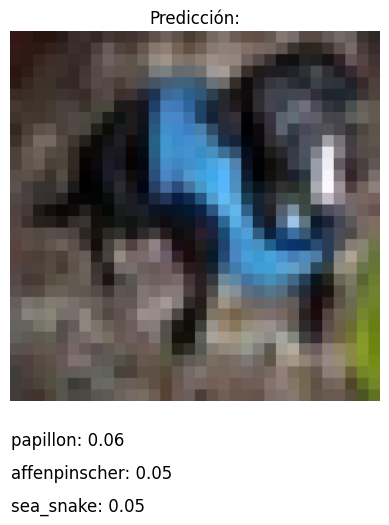

In [ ]:
# Mostrar resultados
plt.imshow(img)
plt.axis('off')
plt.title("Predicción:")
for i, (class_id, name, score) in enumerate(decoded):
    plt.text(0, 250 + i*20, f"{name}: {score:.2f}", fontsize=12)
plt.show()


In [ ]:
# Predecir
preds = model.predict(x)
decoded = decode_predictions(preds, top=3)[0]

# 🧱 ¿Cómo construir una ResNet desde cero?

ResNet está construida con **bloques residuales**, que son pequeñas subredes donde la salida se **suma** con la entrada original (skip connection).

## 🔁 ¿Qué tiene un bloque residual simple?

Un bloque residual clásico incluye:

1. Dos capas `Conv2D` con `BatchNormalization` y `ReLU`.
2. Una **conexión directa** que suma la entrada al final del bloque.
3. Si cambian las dimensiones, se usa una **proyección** (`Conv2D` con `strides > 1`).

---

## 🔧 Estructura de una mini ResNet

Ejemplo simple tipo **ResNet-18** (versión reducida):

- Conv inicial (7x7) + MaxPooling
- 4 bloques de residuales, con 2 capas cada uno:
  - Bloque 1 (64 filtros)
  - Bloque 2 (128 filtros)
  - Bloque 3 (256 filtros)
  - Bloque 4 (512 filtros)
- GlobalAveragePooling
- Dense final (softmax)

Cada bloque duplica los filtros y reduce la resolución con `strides=2`.

---

## 🧠 ¿Por qué es tan buena?

- Permite redes **muy profundas** sin que se "bloqueen".
- Aprende identidades si no necesita transformar (por eso "residual").
- Se entrena **más rápido y con menos error**.

---


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense

# 🔁 Bloque residual básico
def residual_block(x, filters, downsample=False):
    shortcut = x

    strides = 2 if downsample else 1

    # Primera capa
    x = Conv2D(filters, (3, 3), strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Segunda capa
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    # Ajustar el atajo (shortcut) si cambia el tamaño
    if downsample or x.shape[-1] != shortcut.shape[-1]:
        shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Suma residual
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

In [ ]:
# 🚀 Crear la mini ResNet
def build_resnet(input_shape=(64, 64, 3), num_classes=10):
    inputs = Input(shape=input_shape)

    # Capa inicial
    x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Bloques residuales
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, downsample=True)
    x = residual_block(x, 128)

    x = residual_block(x, 256, downsample=True)
    x = residual_block(x, 256)

    x = residual_block(x, 512, downsample=True)
    x = residual_block(x, 512)

    # Promedio global y capa de salida
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# 🧪 Crear y mostrar resumen del modelo
model = build_resnet()
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 32, 32,    │      9,472 │ input_layer_8[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_21[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 32, 32,    │     36,928 │ activation_17[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_22[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_18       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 32, 32,    │     36,928 │ activation_18[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_23[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ activation_17[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_19       │ (None, 32, 32,    │          0 │ add_8[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 32, 32,    │     36,928 │ activation_19[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_24[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 32, 32,    │     36,928 │ activation_20[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_25[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat

 Total params: 11,196,042 (42.71 MB)

 Trainable params: 11,186,442 (42.67 MB)

 Non-trainable params: 9,600 (37.50 KB)

# 🔄 ¿Cómo fluye una imagen dentro de un bloque residual?

## 🎯 Objetivo de un bloque residual

Un **bloque residual** toma una entrada, la transforma con algunas capas, y al final **suma la entrada original con la salida transformada**.

Esto permite que la red:
- Aprenda solo lo **necesario** (residuo),
- Mantenga información útil de las capas anteriores,
- Se entrene más fácilmente, incluso cuando es profunda.

---

## 🔍 Paso a paso del flujo

Imagina que estás procesando una imagen:

                Entrada (x)
                    │
        ┌───────────┴────────────┐
        │                        │
        ▼                        ▼
     Conv2D                  (shortcut)
     + BatchNorm               (x)
     + ReLU
        │
     Conv2D
     + BatchNorm
        │
        ▼
     Suma: salida intermedia + shortcut
        │
     ReLU final
        ▼
     Salida del bloque

---

## 🧠 ¿Qué pasa si el bloque no necesita aprender nada?

La red puede simplemente dejar pasar la entrada sin modificarla:  
`output = x + 0 = x`

Esto evita que capas innecesarias dañen lo que ya funciona. Por eso se llama **"residual"**, porque el bloque solo aprende el **cambio necesario**.

---

## ✅ ¿Cómo lo implementamos en Keras?

Puedes usar este patrón general:

1. Aplicar 2 capas `Conv2D` + `BatchNormalization` + `ReLU`.
2. Sumar el resultado con la entrada original (`Add()`).
3. Activación final.

**Ejemplo base:**

1. Crear una función para el bloque residual.
2. Pasar una imagen por ese bloque.
3. Visualizar cómo se ve **antes y después** en uno de los canales.

Este flujo te ayudará a entender cómo la red transforma (o no) la imagen original.

---


# 🧪 Reto guiado: Entrena una red tipo LeNet con imágenes aumentadas

Vamos a construir paso a paso una red neuronal convolucional inspirada en **LeNet** para clasificar imágenes de 10 clases usando aumentos de datos y Keras.

---

## 🗂️ Estructura del dataset

Las imágenes están organizadas por clase en la carpeta `data/train/`, con subcarpetas como:

- `data/train/avion/`
- `data/train/gato/`
- `data/train/perro/`
- ...

Cada clase tiene ~100 imágenes de tamaño 32x32 en color (RGB).

---

## 🧩 Etapas del reto

### 1. Preparar los generadores de datos

Usa `ImageDataGenerator` con los siguientes hiperparámetros:

- **rescale**: 1./255
- **rotation_range**: 15
- **width_shift_range**: 0.1
- **height_shift_range**: 0.1
- **zoom_range**: 0.1
- **horizontal_flip**: True
- **validation_split**: 0.2 (80% entrenamiento / 20% validación)

Luego crea dos generadores (`flow_from_directory`) para cargar imágenes con:

- `target_size=(32, 32)`
- `batch_size=32`
- `class_mode='categorical'`
- `subset='training'` y `subset='validation'`

---

### 2. Construir la red neuronal tipo LeNet

Sigue esta estructura secuencial:

1. Capa convolucional con 6 filtros, kernel de 5x5, padding 'same', activación ReLU.
2. Capa de max pooling de 2x2.
3. Capa convolucional con 16 filtros, kernel de 5x5, activación ReLU.
4. Capa de max pooling de 2x2.
5. Aplanamiento (`Flatten`).
6. Capa densa con 120 unidades, activación ReLU.
7. Capa densa con 84 unidades, activación ReLU.
8. Capa densa final con 10 unidades, activación softmax.

---

### 3. Compilar el modelo

Utiliza:

- **optimizer**: `'adam'`
- **loss**: `'categorical_crossentropy'`
- **metrics**: `['accuracy']`

---

### 4. Entrenar el modelo

Entrena durante **10 épocas** usando los generadores de entrenamiento y validación.

---

### 5. Visualizar resultados

Grafica dos curvas:

- **Precisión (accuracy)** por época (entrenamiento y validación)
- **Pérdida (loss)** por época (entrenamiento y validación)

Usa `matplotlib.pyplot`.

---

## ✅ Objetivo final

- Que el modelo entrene sin errores.
- Que se observe una mejora en las curvas.
- Que se obtenga al menos un **60% de accuracy en validación** al finalizar.

---

¡Buena suerte! 🚀


In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 1️⃣ Preparar los generadores
train_dir = 'data/train'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [ ]:
# 2️⃣ Modelo tipo LeNet
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 3️⃣ Compilación
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 4️⃣ Entrenamiento
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.1265 - loss: 2.3120 - val_accuracy: 0.1900 - val_loss: 2.2884
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.1505 - loss: 2.2684 - val_accuracy: 0.2100 - val_loss: 2.1874
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.2462 - loss: 2.0960 - val_accuracy: 0.2450 - val_loss: 2.1066
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.2928 - loss: 1.9250 - val_accuracy: 0.2950 - val_loss: 1.9884
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.3475 - loss: 1.8787 - val_accuracy: 0.2800 - val_loss: 2.0164
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.2985 - loss: 1.8491 - val_accuracy: 0.3000 - val_loss: 1.9064
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.3388 - loss: 1.8258 - val_accuracy: 0.3450 - val_loss: 1.8753
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.3209 - loss: 1.7663 - val_accuracy: 0.3500 -

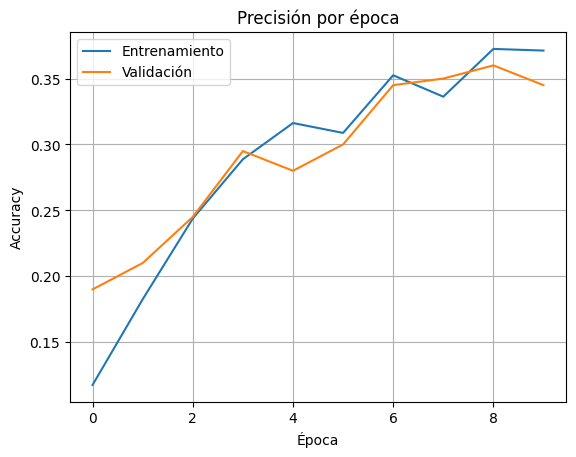

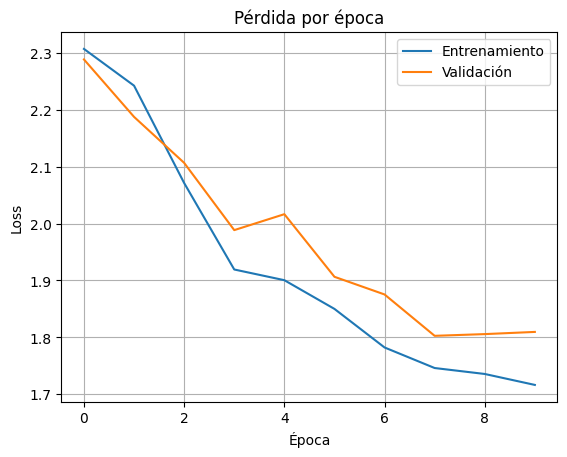

In [ ]:
# 5️⃣ Visualización
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
